In [1]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_union # combine vectors
from sklearn.model_selection import cross_val_score # validate training data
from nltk.stem.snowball import EnglishStemmer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv('PROJ/train.csv')
test_data = pd.read_csv('PROJ/test.csv')
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [3]:
train = train_data['comment_text']
test = test_data['comment_text']

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

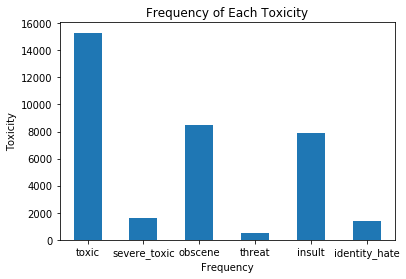

In [4]:
toxic = len(train_data[train_data.toxic == 1])
severe_toxic = len(train_data[train_data.severe_toxic == 1])
obscene = len(train_data[train_data.obscene == 1])
threat = len(train_data[train_data.threat == 1])
insult = len(train_data[train_data.insult == 1])
identity_hate = len(train_data[train_data.identity_hate == 1])
count_array = [toxic,severe_toxic,obscene,threat,insult,identity_hate]


score_df = pd.DataFrame(index=class_names)
score_df['class'] = count_array
freq_plot = score_df['class'].plot('bar')
plt.title("Frequency of Each Toxicity")
plt.xlabel("Frequency")
plt.ylabel("Toxicity")
plt.xticks(rotation = 360)


# ----------------------------------

In [5]:
#Stemming using Snowball-English
stemmer = EnglishStemmer()
analyzer = TfidfVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
#Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    analyzer=stemmed_words,
    token_pattern='[a-z]{3, 15}',
    ngram_range=(1, 2),
    max_features=10000)

vectorizer = tfidf_vectorizer

vectorizer.fit(train)

train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

In [6]:
# Using LR to fit training set to calculate test set
submission = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(solver='lbfgs',max_iter=5000)

    classifier.fit(train_vec, train_target)
    submission[class_name] = classifier.predict_proba(test_vec)[:, 1]

In [7]:
submission.to_csv('PROJ/submission_1.csv', index=False)
# Result: 0.97609

# -------------------------------------------

In [8]:
# Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    analyzer= 'word',
    token_pattern=r'\w{1,}',
    stop_words= 'english',
    ngram_range=(1, 2),
    max_features=10000)

vectorizer = tfidf_vectorizer

vectorizer.fit(train)

train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

In [9]:
# Using LR to fit training set to calculate test set
submission2 = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(solver='lbfgs',max_iter=5000)

    classifier.fit(train_vec, train_target)
    submission2[class_name] = classifier.predict_proba(test_vec)[:, 1]

In [10]:
submission2.to_csv('PROJ/submission_2.csv', index=False)
# Result: 0.97215

# -------------------------------

In [11]:
#Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    #strip_accents='unicode',
    #analyzer= 'word',
    token_pattern=r'\w{1,}'
    #stop_words= 'english',
    #ngram_range=(1, 2),
    #max_features=10000)
)

vectorizer = tfidf_vectorizer

vectorizer.fit(train)

train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

In [12]:
# Using LR to fit training set to calculate test set
submission3 = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(solver='lbfgs',max_iter=5000)
    
    classifier.fit(train_vec, train_target)
    submission3[class_name] = classifier.predict_proba(test_vec)[:, 1]

In [13]:
submission3.to_csv('PROJ/submission_3.csv', index=False)
# Result: 0.97375

# -----------------------------------

In [14]:
all_comments = pd.concat([train,test])
#Vectorizer
tfidf_vectorizer_word = TfidfVectorizer(
    strip_accents='unicode',
    analyzer= 'word',
    token_pattern=r'\w{1,}',
    stop_words= 'english',
    ngram_range=(1, 1),
    max_features=10000)

tfidf_vectorizer_char = TfidfVectorizer(
    strip_accents='unicode',
    analyzer= 'char',
    token_pattern=r'\w{1,}',
    stop_words= 'english',
    ngram_range=(2, 6),
    max_features=10000)

# Combining two vectors
vectorizer = make_union(tfidf_vectorizer_word,tfidf_vectorizer_char,n_jobs=3)

vectorizer.fit(train)

train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

In [15]:
# Using LR to fit training set to calculate test set
submission4 = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(solver='lbfgs',max_iter=5000)  
    
    classifier.fit(train_vec, train_target)
    submission4[class_name] = classifier.predict_proba(test_vec)[:, 1]


In [16]:
submission4.to_csv('PROJ/submission_4.csv', index=False)
#Result: 0.97624

# ---------------------------------------------

In [18]:
#Stemming
stemmer = EnglishStemmer()
analyzer = TfidfVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
#Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    analyzer=stemmed_words,
    token_pattern='[a-z]{3, 15}',
    ngram_range=(1, 2),
    max_features=10000)

vectorizer = tfidf_vectorizer

vectorizer.fit(train)

train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

In [19]:
# Using RF to fit training set to calculate test set
submission5 = pd.DataFrame.from_dict({'id': test_data['id']})
for class_name in class_names:
    train_target = train_data[class_name]
    classifier = RandomForestClassifier(bootstrap=True, criterion='gini', max_features=1000, random_state=None,n_estimators=10)

    classifier.fit(train_vec, train_target)
    submission5[class_name] = classifier.predict_proba(test_vec)[:, 1]


In [20]:
submission5.to_csv('PROJ/submission_5.csv', index=False)
# Test Result: 0.90573